## import libraries

In [18]:
import torch
import gym
import matplotlib.pyplot as plt
env = gym.make('Taxi-v3')

In [19]:
def gen_epsilon_greedy_policy(n_action, epsilon):
  def policy_function(state, Q):
    probs = torch.ones(n_action) * epsilon / n_action
    best_action = torch.argmax(Q[state]).item()
    probs[best_action] += 1.0 - epsilon
    action = torch.multinomial(probs, 1).item()
    return action
  return policy_function

In [20]:
n_episode = 10000
length_episode = [0] * n_episode
total_reward_episode = [0] * n_episode

In [21]:
def double_q_learning(env, gamma, n_episode, alpha):
  n_action = env.action_space.n
  n_state = env.observation_space.n
  Q1 = torch.zeros(n_state, n_action)
  Q2 = torch.zeros(n_state, n_action)
  for episode in range(n_episode):
    state = env.reset()
    is_done = False
    while not is_done:
      action = epsilon_greedy_policy(state, Q1 + Q2)
      next_state, reward, is_done, info = env.step(action)
      if (torch.rand(1).item() < 0.5):
        best_next_action = torch.argmax(Q1[next_state])
        td_delta = reward + gamma * Q2[next_state][best_next_action] - Q1[state][action]
        Q1[state][action] += alpha * td_delta
      else:
        best_next_action = torch.argmax(Q2[next_state])
        td_delta = reward + gamma * Q1[next_state][best_next_action] - Q2[state][action]
        Q2[state][action] += alpha * td_delta
      length_episode[episode] += 1
      total_reward_episode[episode] += reward
      if is_done:
        break
      state = next_state
  policy = {}
  Q = Q1 + Q2
  for state in range(n_state):
    policy[state] = torch.argmax(Q[state]).item()
  return Q, policy

In [22]:
gamma = 1
alpha = 0.4
epsilon = 0.1
epsilon_greedy_policy = gen_epsilon_greedy_policy(env.action_space.n, epsilon)

In [23]:
optimal_Q, optimal_policy = double_q_learning(env, gamma,n_episode, alpha)

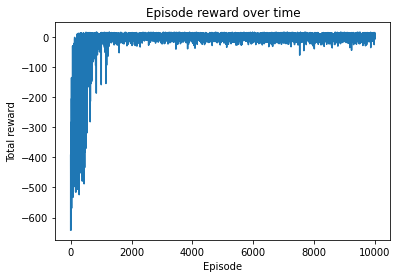

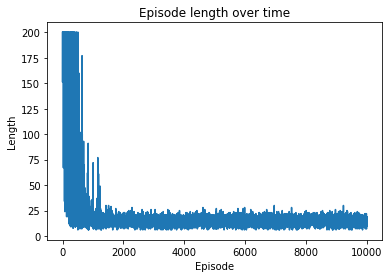

In [24]:
plt.plot(total_reward_episode)
plt.title('Episode reward over time')
plt.xlabel('Episode')
plt.ylabel('Total reward')
plt.show()
plt.plot(length_episode)
plt.title('Episode length over time')
plt.xlabel('Episode')
plt.ylabel('Length')
plt.show()